In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [2]:
#import dataframes
df = pd.read_csv('df.csv')
dfdummy = pd.read_csv('dfdummy.csv')

In [3]:
#train test split
from sklearn.model_selection import train_test_split

features = dfdummy.drop('charges', axis =1)
target = dfdummy.charges.values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [4]:
#train validation split
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,shuffle=True,test_size=0.225) #0.225 x 0.9 = 0.20

In [5]:
#import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

In [6]:
#model performance function
def model_eval(alg,X_train,X_test,y_train,y_test):
    #predict
    y_train_pred = alg.predict(X_train)
    y_test_pred = alg.predict(X_test)
    
    #scores and errors
    print("Train R2 Score:", r2_score(y_train, y_train_pred))
    print("Test R2 Score:,", r2_score(y_test, y_test_pred))
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("Train RMSE: %.4f" % train_rmse)
    print("Test RMSE: %.4f" % test_rmse)

# Multiple Linear Regression

In [7]:
#cross validation
cv_linreg=np.mean(cross_val_score(LinearRegression(), X_train, y_train, scoring='r2', cv=5))
print("CV Linear Regression R2 Score:", cv_linreg)

CV Linear Regression R2 Score: 0.7465008103458814


In [8]:
#train the algorithm
linreg = LinearRegression().fit(X_train, y_train)

#intercept:
print('Intercept:',linreg.intercept_)

Intercept: 6424.614799877931


In [9]:
#model evaluation
print("Linear Regression Model Performance:\n")
model_eval(linreg,X_train, X_test, y_train, y_test)

Linear Regression Model Performance:

Train R2 Score: 0.760087061637634
Test R2 Score:, 0.7379420849431488
Train RMSE: 5965.5722
Test RMSE: 6021.5263


Text(0, 0.5, 'Charges')

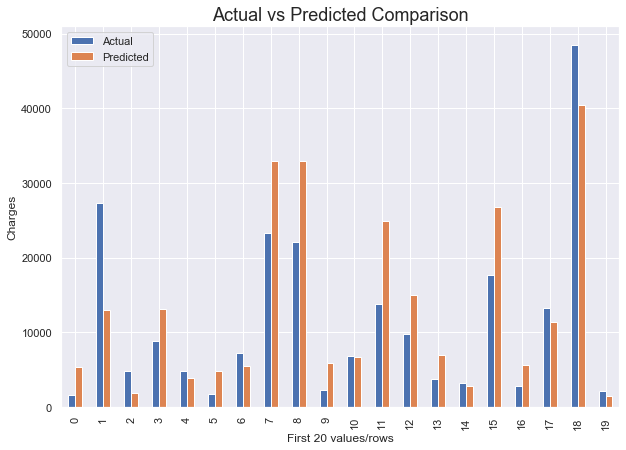

In [10]:
#compare actual and predicted values
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': linreg.predict(X_test)})
df_compare_graph=df_compare.head(20)

#barplot of first 20 values of predicted and actual values
df_compare_graph.plot.bar(figsize=(10,7))
plt.title('Actual vs Predicted Comparison', fontsize=18)
plt.xlabel('First 20 values/rows')
plt.ylabel('Charges')

## Data Normalization

Text(0.5, 1.0, 'Charges: Before Normalization')

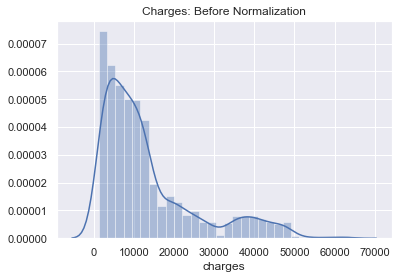

In [11]:
#histogram of charges
sns.distplot(df["charges"])
plt.title("Charges: Before Normalization")

Text(0.5, 1.0, 'Charges: After Normalization')

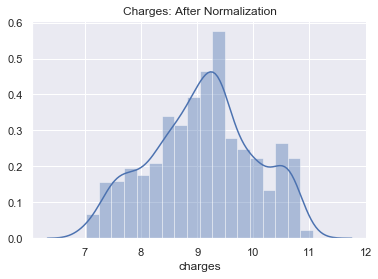

In [12]:
#normalize charges - gaussian curve
norm_charges = np.log(df['charges'])
sns.distplot(norm_charges)
plt.title("Charges: After Normalization")

In [13]:
scaler = StandardScaler()
scaler.fit(dfdummy)
norm_df = pd.DataFrame(scaler.transform(dfdummy), columns=dfdummy.columns)
norm_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_cat_normal,bmi_cat_obese,bmi_cat_overweight,bmi_cat_underweight,age_cat_adult,age_cat_middle_age,age_cat_youth
0,-1.438764,-0.453320,-0.908614,0.298584,1.010519,-1.010519,-1.970587,1.970587,-0.565267,-0.566418,-0.611324,1.765481,-0.443599,-1.082625,1.605472,-0.129295,-1.004494,-0.808637,2.960815
1,-1.509965,0.509621,-0.078767,-0.953689,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418,-0.443599,0.923680,-0.622870,-0.129295,-1.004494,-0.808637,2.960815
2,-0.797954,0.383307,1.580926,-0.728675,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418,-0.443599,0.923680,-0.622870,-0.129295,0.995526,-0.808637,-0.337745
3,-0.441948,-1.305531,-0.908614,0.719843,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418,2.254289,-1.082625,-0.622870,-0.129295,0.995526,-0.808637,-0.337745
4,-0.513149,-0.292556,-0.908614,-0.776802,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418,-0.443599,-1.082625,1.605472,-0.129295,0.995526,-0.808637,-0.337745


Text(0.5, 1.0, 'Normalized Data')

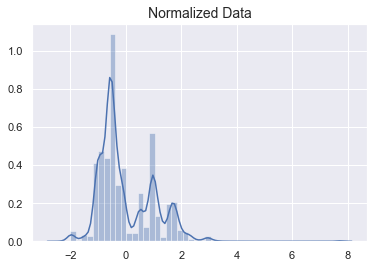

In [14]:
#normalized
sns.distplot(norm_df)
plt.title("Normalized Data",fontsize=14)

In [15]:
#train and test on normalized data
X_norm = norm_df.drop(['charges'], axis=1)
y_norm = norm_df['charges']

X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=1)

lr_norm = LinearRegression().fit(X_norm_train, y_norm_train)
print("Linear Regression (Normalized) Model Performance:\n")
model_eval(lr_norm,X_norm_train,X_norm_test,y_norm_train,y_norm_test)

Linear Regression (Normalized) Model Performance:

Train R2 Score: 0.7550386549587444
Test R2 Score:, 0.761722386262405
Train RMSE: 0.4938
Test RMSE: 0.4927


In [16]:
cv_lr_norm=np.mean(cross_val_score(lr_norm,X_norm,y_norm,scoring='r2',cv=5))
print("CV Normalized Linear Regression R2 Score:",cv_lr_norm)

CV Normalized Linear Regression R2 Score: 0.7502972885073673


# Polynomial Regression

In [18]:
#polynomial degree function
def create_polynomial_regression_model(degree):
    """
    Creates a polynomial regression model for the given degree
    :param degree: integer
    :return: r2 score and rmse
    """
  
    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # predicting on training data-set
    y_train_predict = poly_model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
    r2_train = r2_score(y_train, y_train_predict)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)

    print("Polynomial Regression with degree of", degree, '\n')
    print("Train R2 score: {}".format(r2_train))
    print("Test R2 score: {}".format(r2_test))
    print("Train RMSE: {}".format(rmse_train))
    print("Test RMSE: {}".format(rmse_test))

In [19]:
#test degree 2
create_polynomial_regression_model(2)

Polynomial Regression with degree of 2 

Train R2 score: 0.8816393634227859
Test R2 score: 0.8314800979450454
Train RMSE: 4190.143735567568
Test RMSE: 4828.736938262546


In [20]:
#test degree 3
create_polynomial_regression_model(3)

Polynomial Regression with degree of 3 

Train R2 score: 0.8905930691407871
Test R2 score: -155052356113596.8
Train RMSE: 4028.5401132001743
Test RMSE: 146469477519.20224


In [21]:
#cross validation using deg 2
poly_reg = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_train_poly, y_train)

regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_train_poly, y_train)
cv_poly=np.mean(cross_val_score(regressor_poly2, X_train_poly, y_train, scoring='r2',cv = 5))
print("CV Polynomial Regression R2 Score:", cv_poly)

CV Polynomial Regression R2 Score: 0.8529289285708922


# Lasso Regression

In [22]:
#cross validation
cv_lasso=np.mean(cross_val_score(Lasso(),X_train,y_train, scoring = 'r2', cv=5))
print("CV Lasso Regression R2 Score:", cv_lasso)

CV Lasso Regression R2 Score: 0.746599658883075


In [23]:
#model performance
lasso = Lasso().fit(X_train,y_train)
model_eval(lasso,X_train,X_test,y_train,y_test)

Train R2 Score: 0.7600858483454918
Test R2 Score:, 0.7380281718595536
Train RMSE: 5965.5873
Test RMSE: 6020.5372


In [24]:
#find best param
from sklearn.model_selection import GridSearchCV

lasso= Lasso(tol=1)
param={
    'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
}
grid=GridSearchCV(lasso, param, scoring='r2', cv=5).fit(X_train,y_train)

print(grid.best_params_)
print(grid.best_score_)

{'alpha': 20}
0.7478091793476629


In [25]:
#performance
print("Lasso Regression Model Evaluation:\n")
model_eval(grid,X_train,X_test,y_train,y_test)

Lasso Regression Model Evaluation:

Train R2 Score: 0.7588748192763489
Test R2 Score:, 0.7391849220644685
Train RMSE: 5980.6248
Test RMSE: 6007.2305


## Model Validation

### Linearity

#### Relationship between the features and target variable should be linear.

Text(0.5, 1.0, 'Actual vs. Predicted')

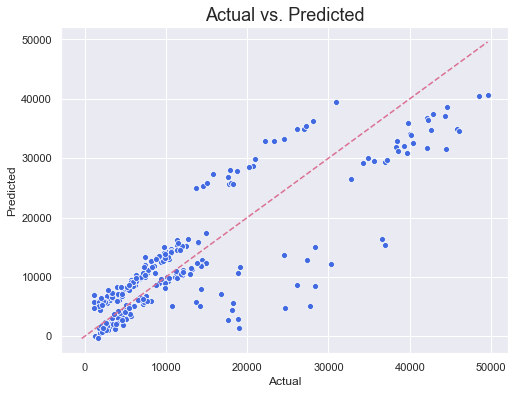

In [26]:
#plot actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x='Actual', y='Predicted', data=df_compare, color="royalblue")
        
#plot diagonal line
line_coords = np.arange(df_compare.min().min(), df_compare.max().max())
plt.plot(line_coords, line_coords,  # X and y points
         color='palevioletred', linestyle='--')
plt.title('Actual vs. Predicted', fontsize=18)

### Residual Error Distribution and Mean

#### Residual error plot should be normally distributed with a mean of (or close to) 0.

In [27]:
#get residuals mean
df_compare['Residuals'] = abs(df_compare['Actual']) - abs(df_compare['Predicted'])
df_compare.Residuals.mean()

91.37430458050196

p-value from the test - below 0.05 generally means non-normal: 3.09983572736397e-22
Residuals are not normally distributed

Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


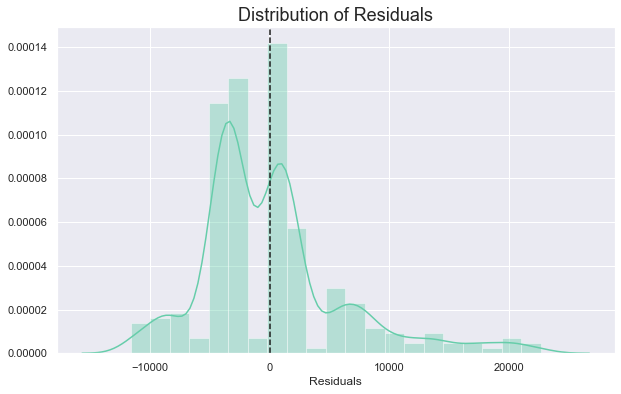

In [28]:
#test for normality
from statsmodels.stats.diagnostic import normal_ad

p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(df_compare['Residuals'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')
    
# Plot the residuals distribution and mean
fig = plt.figure(figsize=(10,6))
ax = fig.subplots()
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df_compare.Residuals, ax=ax, color='mediumaquamarine')
ax.axvline(df_compare.Residuals.mean(), color='k', linestyle='--')

print()
if p_value > p_value_thresh:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')
    print()
    print('Confidence intervals will likely be affected')
    print('Try performing nonlinear transformations on variables')

### Multicollinearity

#### Predictors should not be correlated with each other

In [29]:
#Variance Inflation Factor
VIF = 1/(1- (r2_score(y_test, linreg.predict(X_test))))
print("VIF:", VIF, "\n")

if VIF == 1:
    print("No Correlation")
elif VIF > 1 and VIF <5:
    print("Moderately Correlated")
else:
    print("High Level of Multicollinearity")

VIF: 3.8159503779271797 

Moderately Correlated


In [30]:
columns = X_train.columns
predictors = X_train.values

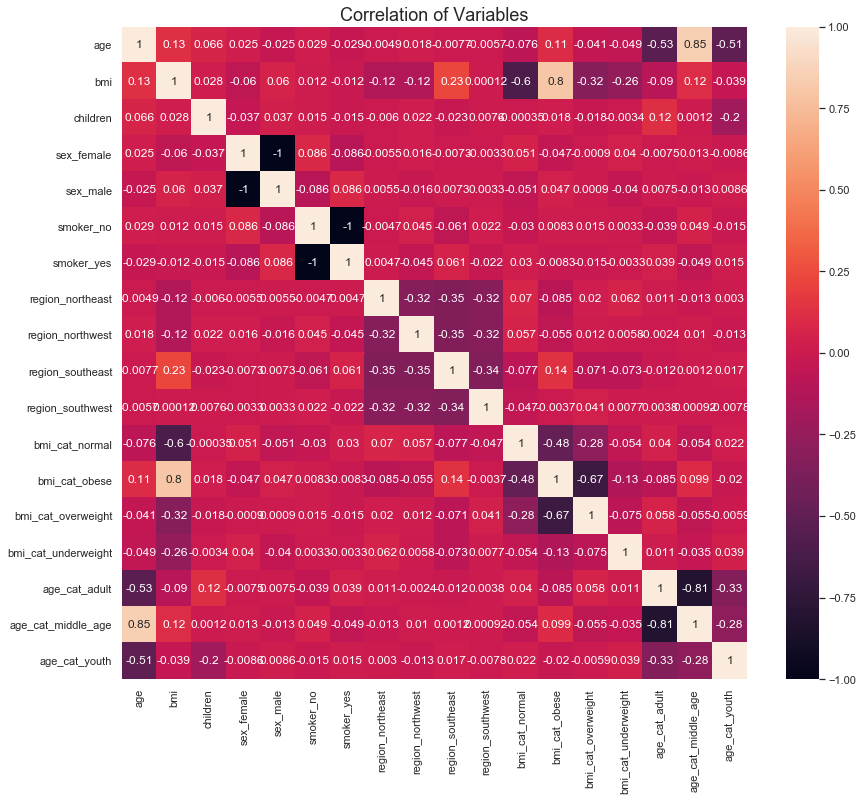

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
age: 5.04821773334499
bmi: 4.032880944482024
children: 1.0502290171393052
sex_female: inf
sex_male: inf
smoker_no: inf
smoker_yes: inf
region_northeast: inf
region_northwest: inf
region_southeast: inf
region_southwest: inf
bmi_cat_normal: inf
bmi_cat_obese: inf
bmi_cat_overweight: inf
bmi_cat_underweight: inf
age_cat_adult: inf
age_cat_middle_age: inf
age_cat_youth: inf

15 cases of possible multicollinearity
15 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
        
# Plotting the heatmap
plt.figure(figsize = (14,12))
sns.heatmap(pd.DataFrame(predictors, columns=columns).corr(), annot=True)
plt.title('Correlation of Variables',fontsize=18)
plt.show()
        
print('Variance Inflation Factors (VIF)')
print('> 10: An indication that multicollinearity may be present')
print('> 100: Certain multicollinearity among the variables')
print('-------------------------------------')
       
# Gathering the VIF for each variable
VIF = [variance_inflation_factor(predictors, i) for i in range(X_train.shape[1])]
for idx, vif in enumerate(VIF):
    print('{0}: {1}'.format(columns[idx], vif))
        
# Gathering and printing total cases of possible or definite multicollinearity
possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
print()
print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
print()

if definite_multicollinearity == 0:
    if possible_multicollinearity == 0:
        print('Assumption satisfied')
    else:
        print('Assumption possibly satisfied')
        print()
        print('Coefficient interpretability may be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

else:
    print('Assumption not satisfied')
    print()
    print('Coefficient interpretability will be problematic')
    print('Consider removing variables with a high Variance Inflation Factor (VIF)')

### Autocorrelation

#### There should be no autocorrelation in the residuals

In [32]:
#durbin watson 
from statsmodels.stats.stattools import durbin_watson

print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation\n')

durbinWatson = durbin_watson(df_compare['Residuals'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation

Durbin-Watson: 2.1170712258555464
Little to no autocorrelation 

Assumption satisfied


### Homoscedasticity

#### Residuals should have relative constant variance

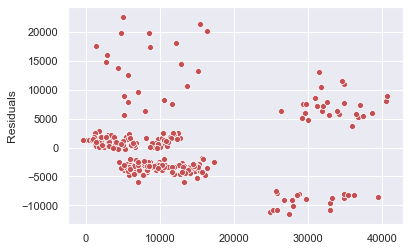

In [33]:
#residuals plot
sns.scatterplot(y = df_compare.Residuals, x= linreg.predict(X_test),color='r') 

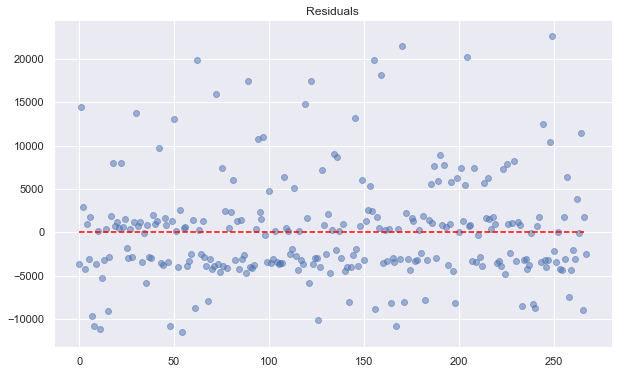

In [34]:
#plot the residuals
plt.subplots(figsize=(10, 6))
ax = plt.subplot(111)  # remove spines
plt.scatter(x=df_compare.index, y=df_compare.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_compare.index.max()), color='red', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

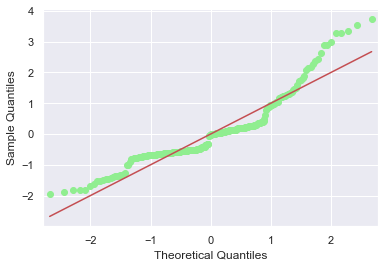

In [35]:
#Multivariate normality Quantile-Quantile plot 
from statsmodels.graphics.gofplots import qqplot
ax=qqplot(df_compare.Residuals, fit=True,line='s',color='lightgreen')

## Backward Elimination

In [36]:
#Significance Level = 0.05. If p-val > SL, remove predictor.

In [37]:
#prepare X_train and X_test for Backward elimination
X_train_B = np.append(np.ones((len(X_train),1)).astype(int),X_train,1)
X_test_B = np.append(np.ones((len(X_test),1)).astype(int),X_test,1)

In [38]:
#fit model on all features
X_opt=X_train_B[:,:]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     257.4
Date:                Thu, 11 Jun 2020   Prob (F-statistic):          3.50e-316
Time:                        00:22:35   Log-Likelihood:                -10821.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1056   BIC:                         2.174e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2267.5111    676.831      3.350      0.001     939.424    3595.598
x1           222.2269     29.287      7.588      0.000     164.759     279.694
x2           119.3267     61.629      1.936      0.053      -1.603     240.256
x3           394.3513    156.154      2.525      0.012      87.943     700.760
x4          1063.4254    385.710      2.757      0.006     306.580    1820.271
x5          1204.0857    385.727      3.122      0.002     447.207    1960.964
x6         -1.082e+04    392.790    -27.536      0.000   -1.16e+04      -1e+04
x7          1.308e+04    421.514     31.039      0.000    1.23e+04    1.39e+04
x8          1238.0303    356.244      3.475      0.001     539.004    1937.056
x9           803.1638    350.866      2.289      0.022     114.691    1491.637
x10           47.0347    388.833      0.121      0.904    -715.937     810.007
x11          179.2823    362.132      0.495      0.621    -531.298     889.863
x12         -167.6843    513.301     -0.327      0.744   -1174.890     839.521
x13         3252.2750    826.629      3.934      0.000    1630.253    4874.297
x14           60.3428    531.261      0.114      0.910    -982.105    1102.790
x15         -877.4224   1257.955     -0.697      0.486   -3345.798    1590.954
x16           77.0491    332.067      0.232      0.817    -574.538     728.636
x17         1444.4244    759.725      1.901      0.058     -46.318    2935.167
x18          746.0377    587.138      1.271      0.204    -406.053    1898.128
==============================================================================
Omnibus:                      263.387   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              666.742
Skew:                           1.289   Prob(JB):                    1.66e-145
Kurtosis:                       5.882   Cond. No.                     7.81e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.67e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
#remove highest pval greater than 0.05
col_delete=14
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     257.4
Date:                Thu, 11 Jun 2020   Prob (F-statistic):          3.50e-316
Time:                        00:22:48   Log-Likelihood:                -10821.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1056   BIC:                         2.174e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2290.8696    774.381      2.958      0.003     771.369    3810.370
x1           222.2269     29.287      7.588      0.000     164.759     279.694
x2           119.3267     61.629      1.936      0.053      -1.603     240.256
x3           394.3513    156.154      2.525      0.012      87.943     700.760
x4          1075.1046    430.710      2.496      0.013     229.959    1920.250
x5          1215.7650    427.585      2.843      0.005     376.752    2054.778
x6          -1.08e+04    433.544    -24.921      0.000   -1.17e+04   -9953.557
x7           1.31e+04    463.444     28.256      0.000    1.22e+04     1.4e+04
x8          1243.8699    369.043      3.371      0.001     519.729    1968.011
x9           809.0035    360.893      2.242      0.025     100.855    1517.152
x10           52.8743    402.941      0.131      0.896    -737.781     843.530
x11          185.1219    372.747      0.497      0.620    -546.288     916.532
x12         -228.0271    641.116     -0.356      0.722   -1486.034    1029.980
x13         3191.9322    623.896      5.116      0.000    1967.715    4416.149
x14         -937.7652   1698.146     -0.552      0.581   -4269.890    2394.360
x15           84.8352    348.868      0.243      0.808    -599.719     769.389
x16         1452.2105    779.127      1.864      0.063     -76.602    2981.023
x17          753.8238    592.135      1.273      0.203    -408.071    1915.718
==============================================================================
Omnibus:                      263.387   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              666.742
Skew:                           1.289   Prob(JB):                    1.66e-145
Kurtosis:                       5.882   Cond. No.                     6.95e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.88e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
#remove highest pval greater than 0.05
col_delete=10
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     257.4
Date:                Thu, 11 Jun 2020   Prob (F-statistic):          3.50e-316
Time:                        00:22:56   Log-Likelihood:                -10821.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1056   BIC:                         2.174e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2313.5300    891.307      2.596      0.010     564.595    4062.465
x1           222.2269     29.287      7.588      0.000     164.759     279.694
x2           119.3267     61.629      1.936      0.053      -1.603     240.256
x3           394.3513    156.154      2.525      0.012      87.943     700.760
x4          1086.4349    483.801      2.246      0.025     137.115    2035.755
x5          1227.0952    481.309      2.549      0.011     282.664    2171.527
x6         -1.079e+04    487.029    -22.161      0.000   -1.17e+04   -9837.279
x7          1.311e+04    512.762     25.561      0.000    1.21e+04    1.41e+04
x8          1190.9956    527.208      2.259      0.024     156.502    2225.489
x9           756.1291    529.407      1.428      0.154    -282.680    1794.938
x10          132.2476    523.546      0.253      0.801    -895.061    1159.557
x11         -228.0271    641.116     -0.356      0.722   -1486.034    1029.980
x12         3191.9322    623.896      5.116      0.000    1967.715    4416.149
x13         -937.7652   1698.146     -0.552      0.581   -4269.890    2394.360
x14           92.3887    374.448      0.247      0.805    -642.358     827.135
x15         1459.7640    802.311      1.819      0.069    -114.542    3034.070
x16          761.3773    600.314      1.268      0.205    -416.566    1939.321
==============================================================================
Omnibus:                      263.387   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              666.742
Skew:                           1.289   Prob(JB):                    1.66e-145
Kurtosis:                       5.882   Cond. No.                     1.39e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
#remove highest pval greater than 0.05
col_delete=14
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     257.4
Date:                Thu, 11 Jun 2020   Prob (F-statistic):          3.50e-316
Time:                        00:23:06   Log-Likelihood:                -10821.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1056   BIC:                         2.174e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2359.7244   1020.858      2.312      0.021     356.584    4362.864
x1           222.2269     29.287      7.588      0.000     164.759     279.694
x2           119.3267     61.629      1.936      0.053      -1.603     240.256
x3           394.3513    156.154      2.525      0.012      87.943     700.760
x4          1109.5320    543.812      2.040      0.042      42.458    2176.606
x5          1250.1924    542.081      2.306      0.021     186.515    2313.870
x6         -1.077e+04    545.981    -19.726      0.000   -1.18e+04   -9698.503
x7          1.313e+04    570.865     22.999      0.000     1.2e+04    1.42e+04
x8          1190.9956    527.208      2.259      0.024     156.502    2225.489
x9           756.1291    529.407      1.428      0.154    -282.680    1794.938
x10          132.2476    523.546      0.253      0.801    -895.061    1159.557
x11         -228.0271    641.116     -0.356      0.722   -1486.034    1029.980
x12         3191.9322    623.896      5.116      0.000    1967.715    4416.149
x13         -937.7652   1698.146     -0.552      0.581   -4269.890    2394.360
x14         1367.3753    753.439      1.815      0.070    -111.033    2845.784
x15          668.9886    756.252      0.885      0.377    -814.939    2152.916
==============================================================================
Omnibus:                      263.387   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              666.742
Skew:                           1.289   Prob(JB):                    1.66e-145
Kurtosis:                       5.882   Cond. No.                     7.54e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  5e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
#remove highest pval greater than 0.05
col_delete=10
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     279.0
Date:                Thu, 11 Jun 2020   Prob (F-statistic):          2.12e-317
Time:                        00:23:15   Log-Likelihood:                -10821.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1057   BIC:                         2.173e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2423.3235    988.884      2.451      0.014     482.925    4363.722
x1           222.2403     29.274      7.592      0.000     164.798     279.682
x2           117.0918     60.964      1.921      0.055      -2.532     236.716
x3           395.1987    156.049      2.533      0.011      88.997     701.400
x4          1140.9399    529.172      2.156      0.031     102.593    2179.287
x5          1282.3836    526.654      2.435      0.015     248.977    2315.790
x6         -1.074e+04    528.205    -20.324      0.000   -1.18e+04   -9698.707
x7          1.316e+04    559.019     23.539      0.000    1.21e+04    1.43e+04
x8          1125.7202    459.329      2.451      0.014     224.420    2027.020
x9           690.1635    460.311      1.499      0.134    -213.063    1593.390
x10         -241.8303    638.501     -0.379      0.705   -1494.703    1011.042
x11         3199.6033    622.881      5.137      0.000    1977.380    4421.827
x12         -944.8777   1697.161     -0.557      0.578   -4275.065    2385.310
x13         1368.2298    753.098      1.817      0.070    -109.507    2845.967
x14          667.1060    755.880      0.883      0.378    -816.091    2150.303
==============================================================================
Omnibus:                      263.199   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              666.042
Skew:                           1.289   Prob(JB):                    2.35e-145
Kurtosis:                       5.881   Cond. No.                     6.83e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
#remove highest pval greater than 0.05
col_delete=10
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     304.6
Date:                Thu, 11 Jun 2020   Prob (F-statistic):          1.27e-318
Time:                        00:23:23   Log-Likelihood:                -10821.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1058   BIC:                         2.173e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2236.7485    857.106      2.610      0.009     554.928    3918.569
x1           222.6136     29.246      7.612      0.000     165.227     280.000
x2           127.6605     54.181      2.356      0.019      21.347     233.975
x3           393.5053    155.922      2.524      0.012      87.554     699.457
x4          1045.4891    465.118      2.248      0.025     132.830    1958.148
x5          1191.2594    468.296      2.544      0.011     272.364    2110.155
x6         -1.083e+04    470.794    -22.995      0.000   -1.17e+04   -9901.921
x7          1.306e+04    498.034     26.228      0.000    1.21e+04     1.4e+04
x8          1126.3833    459.140      2.453      0.014     225.456    2027.311
x9           695.2988    459.925      1.512      0.131    -207.169    1597.767
x10         3190.9550    622.210      5.128      0.000    1970.049    4411.861
x11         -769.3293   1631.983     -0.471      0.637   -3971.620    2432.961
x12         1356.5356    752.160      1.804      0.072    -119.359    2832.431
x13          667.9610    755.571      0.884      0.377    -814.627    2150.549
==============================================================================
Omnibus:                      261.808   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              661.081
Skew:                           1.283   Prob(JB):                    2.81e-144
Kurtosis:                       5.872   Cond. No.                     1.22e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.93e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
#remove highest pval greater than 0.05
col_delete=11
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     335.3
Date:                Thu, 11 Jun 2020   Prob (F-statistic):          7.58e-320
Time:                        00:23:30   Log-Likelihood:                -10821.
No. Observations:                1070   AIC:                         2.166e+04
Df Residuals:                    1059   BIC:                         2.172e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2141.0473    832.411      2.572      0.010     507.686    3774.409
x1           222.7490     29.234      7.620      0.000     165.387     280.111
x2           134.1800     52.367      2.562      0.011      31.425     236.934
x3           392.5725    155.852      2.519      0.012      86.758     698.387
x4           995.3566    452.631      2.199      0.028     107.201    1883.512
x5          1145.6907    458.043      2.501      0.013     246.916    2044.465
x6         -1.087e+04    459.255    -23.678      0.000   -1.18e+04   -9973.046
x7          1.302e+04    487.678     26.688      0.000    1.21e+04     1.4e+04
x8          1122.2747    458.888      2.446      0.015     221.841    2022.708
x9           701.2841    459.581      1.526      0.127    -200.508    1603.076
x10         3151.1627    616.231      5.114      0.000    1941.990    4360.335
x11         1353.2386    751.851      1.800      0.072    -122.049    2828.526
x12          661.0507    755.151      0.875      0.382    -820.712    2142.814
==============================================================================
Omnibus:                      262.042   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              663.415
Skew:                           1.283   Prob(JB):                    8.74e-145
Kurtosis:                       5.881   Cond. No.                     6.33e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
#remove highest pval greater than 0.05
col_delete=12
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     372.6
Date:                Thu, 11 Jun 2020   Prob (F-statistic):          5.59e-321
Time:                        00:23:36   Log-Likelihood:                -10821.
No. Observations:                1070   AIC:                         2.166e+04
Df Residuals:                    1060   BIC:                         2.171e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2399.2443    778.317      3.083      0.002     872.027    3926.462
x1           209.4884     25.000      8.380      0.000     160.434     258.543
x2           134.5510     52.359      2.570      0.010      31.811     237.291
x3           369.3904    153.569      2.405      0.016      68.057     670.724
x4          1125.6517    427.411      2.634      0.009     286.983    1964.320
x5          1273.5925    434.067      2.934      0.003     421.865    2125.320
x6         -1.075e+04    436.049    -24.649      0.000   -1.16e+04   -9892.530
x7          1.315e+04    463.675     28.355      0.000    1.22e+04    1.41e+04
x8          1126.9414    458.807      2.456      0.014     226.669    2027.214
x9           705.2760    459.507      1.535      0.125    -196.371    1606.923
x10         3160.4216    616.072      5.130      0.000    1951.562    4369.282
x11         1560.9790    713.338      2.188      0.029     161.264    2960.694
==============================================================================
Omnibus:                      259.888   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              651.852
Skew:                           1.276   Prob(JB):                    2.83e-142
Kurtosis:                       5.847   Cond. No.                     7.09e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.66e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
#remove highest pval greater than 0.05
col_delete=9
cols_keep=[]
for x in range(X_opt.shape[1]):
    if x != col_delete :
        cols_keep.append(x)
X_opt = X_opt[:,cols_keep]
X_test_B = X_test_B[:,cols_keep]
model_MLR=sm.OLS(endog=y_train,exog=X_opt).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     418.3
Date:                Thu, 11 Jun 2020   Prob (F-statistic):          8.55e-322
Time:                        00:23:42   Log-Likelihood:                -10822.
No. Observations:                1070   AIC:                         2.166e+04
Df Residuals:                    1061   BIC:                         2.171e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2676.0854    757.613      3.532      0.000    1189.496    4162.675
x1           210.7797     25.002      8.431      0.000     161.721     259.838
x2           120.7512     51.615      2.339      0.019      19.473     222.029
x3           374.7099    153.628      2.439      0.015      73.261     676.159
x4          1263.9857    418.067      3.023      0.003     443.653    2084.319
x5          1412.0997    424.854      3.324      0.001     578.451    2245.749
x6         -1.059e+04    424.416    -24.959      0.000   -1.14e+04   -9760.042
x7          1.327e+04    457.157     29.025      0.000    1.24e+04    1.42e+04
x8           882.4150    430.533      2.050      0.041      37.622    1727.208
x9          3239.0612    614.330      5.273      0.000    2033.621    4444.502
x10         1543.3900    713.701      2.163      0.031     142.963    2943.817
==============================================================================
Omnibus:                      262.520   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              665.486
Skew:                           1.284   Prob(JB):                    3.10e-145
Kurtosis:                       5.886   Cond. No.                     6.63e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.48e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# backward elimination stops here. All p values are less than 0.05

In [47]:
cols_keep

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11]

In [48]:
#all features
X_train.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'bmi_cat_normal',
       'bmi_cat_obese', 'bmi_cat_overweight', 'bmi_cat_underweight',
       'age_cat_adult', 'age_cat_middle_age', 'age_cat_youth'],
      dtype='object')

In [49]:
#show kept features
print(X_train.columns[:9])
print(X_train.columns[10:12])

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest'],
      dtype='object')
Index(['region_southwest', 'bmi_cat_normal'], dtype='object')


In [50]:
#creating new dataframe with features selected from backward elimination
new_df_be = dfdummy[['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southwest', 'bmi_cat_normal','charges']]

In [51]:
#separating data into features and target
X_new=new_df_be.drop('charges',axis=1).values
y_new=new_df_be.charges.values

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
#train test split
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)
scaler = StandardScaler()
scaled_new_df = pd.DataFrame(new_df_be)
std_charges = scaler.fit_transform(scaled_new_df[['charges']])
std_bmi = scaler.fit_transform(scaled_new_df[['bmi']])
std_age = scaler.fit_transform(scaled_new_df[['age']])

linreg_scaled_be = LinearRegression().fit(X_train_reduced,y_train_reduced)

#cross validation
cv_linreg_elim=np.mean(cross_val_score(linreg_scaled_be,X_train_reduced,y_train_reduced,scoring='r2',cv=5))
print("CV Linear Regression (Backward Elim) R2 Score:", cv_linreg_elim)

#predict on scaled and selected features from backward elimination
print("Linear Regression (Backward Elim) Model Evaluation:\n")
model_eval(linreg_scaled_be,X_train_reduced,X_test_reduced,y_train_reduced,y_test_reduced)

CV Linear Regression (Backward Elim) R2 Score: 0.7303421741899834
Linear Regression (Backward Elim) Model Evaluation:

Train R2 Score: 0.7372532177748419
Test R2 Score:, 0.7991456176836989
Train RMSE: 6137.5072
Test RMSE: 5653.4901


# Compare Algorithms

In [54]:
#compare the 5 models by cross validation scores
from sklearn import model_selection

outcome = []
model_names = []
models = [('Linear Regression', cv_linreg, 0.7601, 0.7379, 5966, 6022), 
          ('Normalized Linear Regression', cv_lr_norm, 0.7550, 0.7617, 0.4938, 0.4927),
          ('Polynomial Regression', cv_poly, 0.8816, 0.8315, 4190, 4829),
          ('Lasso', cv_lasso, 0.7589, 0.7392, 5981, 6007),
          ('Linear Regresion Backward Elim', cv_linreg_elim, 0.7373, 0.7991, 7138, 5653) 
]

In [55]:
#create model df
model_df = pd.DataFrame(data = models, columns=['Model','CV','R2 (Train)', 'R2 (Test)', 'RMSE (Train)','RMSE (Test)'])
model_df

,Model,CV,R2 (Train),R2 (Test),RMSE (Train),RMSE (Test)
0,Linear Regression,0.746501,0.7601,0.7379,5966.0000,6022.0000
1,Normalized Linear Regression,0.750297,0.7550,0.7617,0.4938,0.4927
2,Polynomial Regression,0.852929,0.8816,0.8315,4190.0000,4829.0000
3,Lasso,0.746600,0.7589,0.7392,5981.0000,6007.0000
4,Linear Regresion Backward Elim,0.730342,0.7373,0.7991,7138.0000,5653.0000


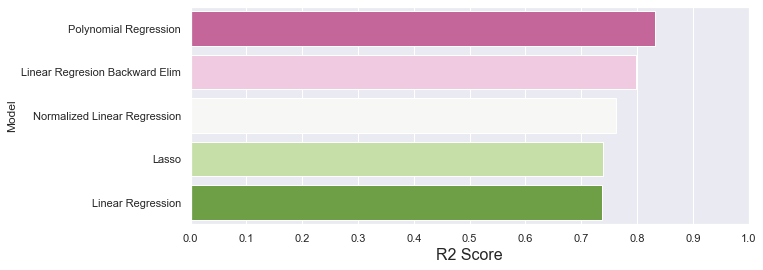

In [57]:
#compare r2 test scores
f, axe = plt.subplots(1,1, figsize=(10,4))

model_df.sort_values(by=['R2 (Test)'], ascending=False, inplace=True)

sns.barplot(x='R2 (Test)', y='Model', data = model_df, ax = axe, palette='PiYG')
axe.set_xlabel('R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

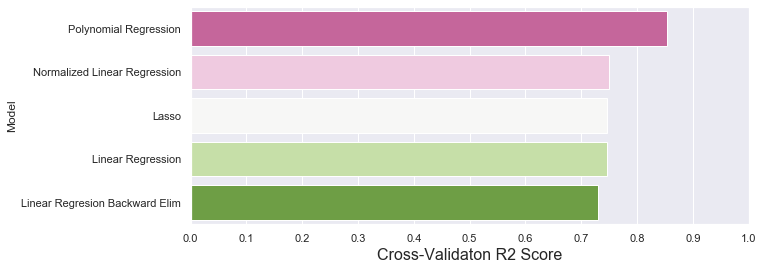

In [58]:
#compare cv scores
f, axe = plt.subplots(1,1, figsize=(10,4))

model_df.sort_values(by=['CV'], ascending=False, inplace=True)

sns.barplot(x='CV', y='Model', data = model_df, ax = axe, palette='PiYG')
axe.set_xlabel('Cross-Validaton R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()